![Bikeshare Insights Header Image](bike_share_header.png)


# Bikeshare Insights: Summer in the Windy City 

This dataset contains information on Divvy Bikes, a bikeshare program that provides residents and visitors of Chicago with a convenient way to explore the city. 

The workspace is set up with one CSV file containing bikeshare activities at the peak of the summer-July 2023. Columns include ride ID, bike type, start and end times, station names and IDs, location coordinates, and member type. Feel free to make this workspace yours by adding and removing cells, or editing any of the existing cells.

[Source: Divvy Bikes](https://divvybikes.com/system-data)

### 🌎 **Some guiding questions to help you explore this data:**
1. How many observations are in the dataset? Are there null values? 
2. How would you clean and prepare the data for analysis?
3. Which bike types are popular and which ones aren't? Check if being a member or casual rider makes a difference in bike choice.
4. Time check! What are the peak and off-peak riding times during the day?

### 📊 **Visualization ideas**
- Bar chart: Display the number of times each bike type is used to identify the most and least used bikes.
- Grouped bar chart: Compare bike usage by member type (member vs. casual) to see if it affects bike choice.
- Heatmap: Vividly illustrate the popularity of bikes at different times during the day and week.

You can query the pre-loaded CSV files using SQL directly. Here’s a **sample query**:

In [1]:
import pandas as pd
data = pd.read_parquet("202307-divvy-tripdata.parquet")
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member


In [2]:

# Convert started_at and ended_at to datetime
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at']) 

# Create a new column with the difference between started_at and ended_at in minutes 
data['ride_length'] = (data['ended_at'] - data['started_at']).dt.total_seconds() / 60

# Get information about the dataset
def info():
    data_info = pd.DataFrame({
    'Column': data.columns,
    'Non-Null Count' : data.count(),
    'Null Count' : data.isnull().sum(),
    '% Null' : (data.isnull().sum() / len(data)) * 100,
    'Data Type': data.dtypes
})
    return data_info

data_info = info()
display(data_info)

,Column,Non-Null Count,Null Count,% Null,Data Type
ride_id,ride_id,573958,0,0.0,object
rideable_type,rideable_type,573958,0,0.0,object
started_at,started_at,573958,0,0.0,datetime64[ns]
ended_at,ended_at,573958,0,0.0,datetime64[ns]
start_station_name,start_station_name,573958,0,0.0,object
start_station_id,start_station_id,573958,0,0.0,object
end_station_name,end_station_name,573958,0,0.0,object
end_station_id,end_station_id,573958,0,0.0,object
start_lat,start_lat,573958,0,0.0,float64
start_lng,start_lng,573958,0,0.0,float64


In [3]:
# Remove duplicates 
#data = data.drop_duplicates()

# Remove rows with null values
data = data.dropna()

# Calculate unique  statons names and their counts
station_count = data['start_station_name'].value_counts()
null_station_count = data['start_station_name'].isnull().sum()





start_station_name
Streeter Dr & Grand Ave                 11222
DuSable Lake Shore Dr & North Blvd       6949
DuSable Lake Shore Dr & Monroe St        6806
Michigan Ave & Oak St                    6579
Theater on the Lake                      5706
                                        ...  
Public Rack - Eberhart Ave & 61st St        1
Public Rack - Kostner & Peterson            1
Public Rack - Troy & 71st                   1
Public Rack - Mason Ave & Archer Ave        1
Public Rack - Ewing Ave & 105th St          1
Name: count, Length: 1157, dtype: int64

0

c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


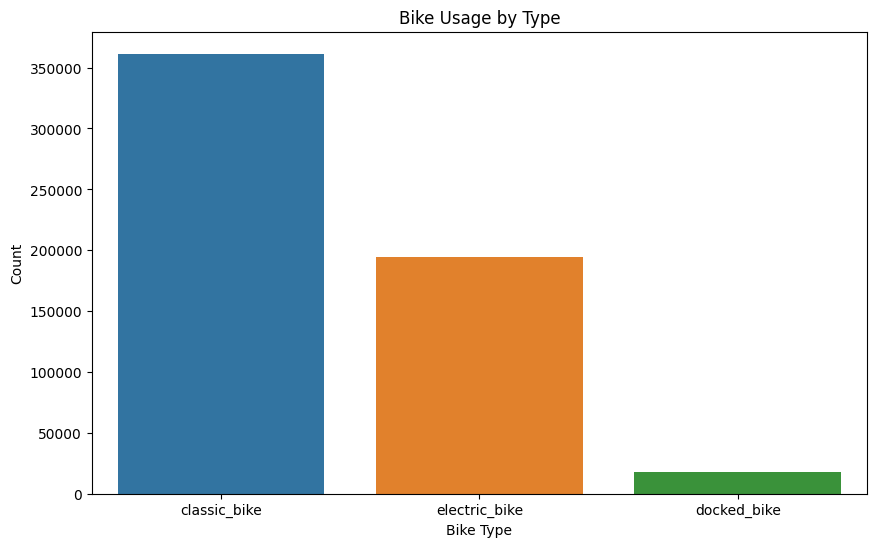

c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Educity\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype

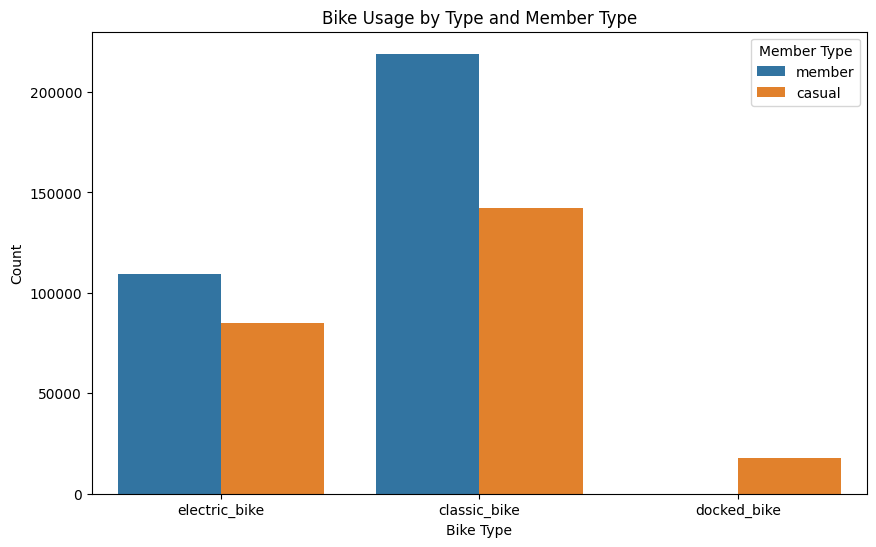

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert "started_at" to datetime
data['started_at'] = pd.to_datetime(data['started_at'])

# Bar chart: Bike usage by type
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='rideable_type', order=data['rideable_type'].value_counts().index)
plt.title('Bike Usage by Type')
plt.xlabel('Bike Type')
plt.ylabel('Count')
plt.show()

# Grouped bar chart: Bike usage by member type
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='rideable_type', hue='member_casual')
plt.title('Bike Usage by Type and Member Type')
plt.xlabel('Bike Type')
plt.ylabel('Count')
plt.legend(title='Member Type')
plt.show()


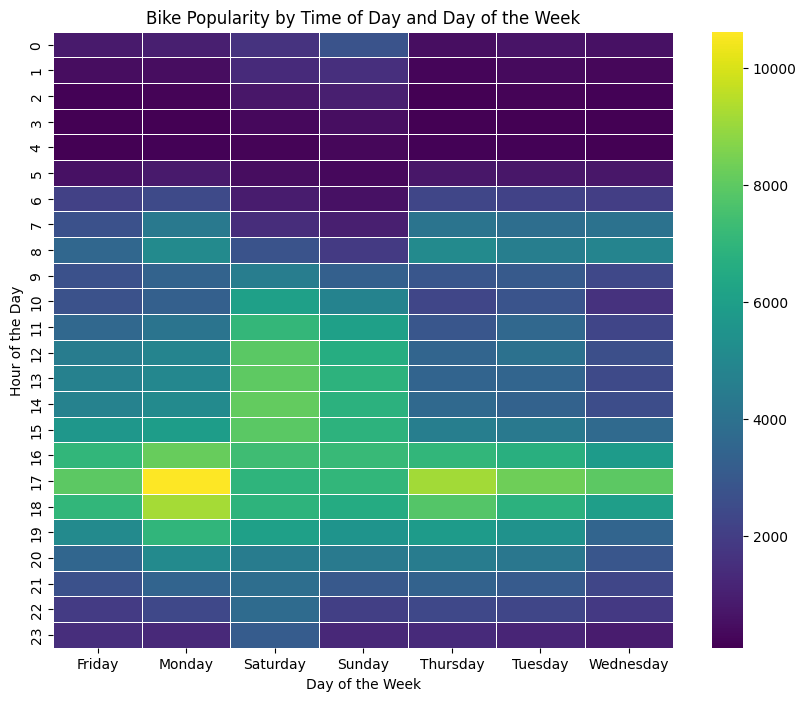

In [5]:
# Heatmap: Bike popularity by time of day and day of the week
data['hour'] = data['started_at'].dt.hour
data['day_of_week'] = data['started_at'].dt.day_name()

heatmap_data = data.groupby(['hour', 'day_of_week'])['rideable_type'].count().unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(data=heatmap_data, cmap='viridis', annot=False, fmt='d', linewidths= 0.5)
plt.title('Bike Popularity by Time of Day and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()
